In [25]:
library(Boruta)
library(stringr)
library(RcppCNPy);

In [26]:
columns_trn <- as.vector(unlist(read.csv('../../data/metadata/headers.csv', header = F)))
data <- as.data.frame(npyLoad('../../data/scaled/data_scaled_train.npy'))
colnames(data) <- columns_trn

In [27]:
percentage_na <- round(sum(is.na(data)) / nrow(data),2)
cat(str_glue('Percentage NAs: {percentage_na}%'), '\n')
cat(str_glue('Number of rows in data: {nrow(data)}'),'\n')
cat(str_glue('Number of cols in data: {ncol(data)}'),'\n')

Percentage NAs: 0% 
Number of rows in data: 53211 
Number of cols in data: 44 


In [28]:
head(data)

VAL_23-FT-92537-01:X.Value,VAL_23-TT-92539:X.Value,VAL_23-PT-92539:X.Value,VAL_23-FT-92512:X.Value,VAL_23-FT-92521:X.Value,VAL_23-KA-9101-M01-62B:X.Value,VAL_23-KA-9101_APE:VALUE,VAL_23-KA-9101_APH:VALUE,VAL_23-KA-9101_APR:VALUE,VAL_23-KA-9101_ASP:VALUE,⋯,VAL_23-TT-92533:X.Value,VAL_23-VA-9110-M01-EL:XS.MeasuredValues.CurrentL2.Value.Value,VAL_23_FIC_92543_01:Z.X.Value,VAL_23_FIC_92543_04:Z.X.Value,VAL_23_FIC_92543_06:Z.X.Value,VAL_23_FIC_92543_08:Z.X.Value,VAL_23_KA_9101_M01_62C:Z.X.Value,VAL_23_PT_92531:Z.X.Value,VAL_23_TT_92532:Z.X.Value,VAL_23_ZT_92543:Z.X.Value
1.10868390,-0.9018792,0.59226089,-0.7313163,0.6043833,0.84892017,-0.19985744,-0.23806987,-0.2038999,0.38286932,⋯,-0.8067318,-0.9643156,0.9088547,0.4870087,1.0100222,0.58421979,0.83487319,1.02065136,-0.8445537,1.05874355
1.67168208,-0.9847118,1.30837675,0.5894199,0.5082908,1.60264856,-0.08005929,-0.17553442,-0.1084026,0.83193749,⋯,-0.7623305,-0.9261422,-0.1505350,0.5118983,1.4372998,1.33601192,1.62887881,1.40063652,-0.8418645,0.08937945
-0.38449615,-0.7414679,0.29999521,-0.4312286,0.2842888,-0.06638600,0.48270036,0.42291562,0.6208847,-0.43880656,⋯,-0.5011904,-0.8398856,0.5109953,-0.6635110,-0.3897850,0.31556992,-0.09098419,-0.39447438,-0.6729756,0.43395928
0.01213974,-0.4747149,-0.32209578,-0.8871321,0.2090211,-0.09620271,0.03228139,0.07564759,0.1335119,0.31291724,⋯,-0.4894486,-0.8401218,0.9821219,0.1543355,-0.3515647,-0.29899573,-0.06741133,-0.34935793,-0.5469568,0.95258730
-0.85412062,-0.5616767,-0.07544574,-0.8738834,0.2928675,-0.84694816,0.03661857,0.06609866,0.1261247,0.05593795,⋯,-0.5935931,-0.8665451,0.7480929,-1.0764860,-0.4025461,-0.05316308,-0.71533866,-0.44030797,-0.5714308,0.63383304
0.93289982,-0.5863150,-0.31996593,-0.5089724,0.4264570,0.59072566,-0.24896968,-0.19374227,-0.1988521,0.37422745,⋯,-0.7276495,-0.8726021,0.7171137,0.9581776,-0.1106010,-0.31959078,0.53482285,-0.07107266,-0.6574264,1.00097645


In [29]:
response <- 'VAL_23-TT-92539:X.Value'
names(data)[names(data) == response] <- 'response'

In [30]:
head(data$response)

[1] -0.9018792 -0.9847118 -0.7414679 -0.4747149 -0.5616767 -0.5863150

In [31]:
boruta_output <- Boruta(response ~., data = head(data, 5000), doTrace = 2, ntree = 500)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
 13. run of importance source...
After 13 iterations, +54 secs: 
 confirmed 39 attributes: `VAL_23_FIC_92543_01:Z.X.Value`, `VAL_23_FIC_92543_04:Z.X.Value`, `VAL_23_FIC_92543_06:Z.X.Value`, `VAL_23_FIC_92543_08:Z.X.Value`, `VAL_23_KA_9101_M01_62C:Z.X.Value` and 34 more;
 still have 4 attributes left.

 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
After 17 iterations, +1.2 mins: 
 confirmed 3 attributes: `VAL_23_PT_92531:Z.X.Value`, `VAL_23-KA-9101_PHD:VALUE`, `VAL_23-PT-92532:X.Value`;
 still have 1 attribute left.

 18. 

In [32]:
boruta_bank <- TentativeRoughFix(boruta_output)
boruta_bank

Warning message in TentativeRoughFix(boruta_output):
“There are no Tentative attributes! Returning original object.”

Boruta performed 20 iterations in 1.379086 mins.
 43 attributes confirmed important: `VAL_23_FIC_92543_01:Z.X.Value`,
`VAL_23_FIC_92543_04:Z.X.Value`, `VAL_23_FIC_92543_06:Z.X.Value`,
`VAL_23_FIC_92543_08:Z.X.Value`, `VAL_23_KA_9101_M01_62C:Z.X.Value` and
38 more;
 No attributes deemed unimportant.

In [33]:
selected_attributes <- attStats(boruta_bank)
selected_attributes_sorted <- as.data.frame(
    selected_attributes[
        order(selected_attributes$meanImp, decreasing = T), 
    ]
)
head(selected_attributes_sorted, 10)

,meanImp,medianImp,minImp,maxImp,normHits,decision
`VAL_23-TT-92533:X.Value`,33.73168,33.54707,32.077665,35.82499,1,Confirmed
`VAL_23_TT_92532:Z.X.Value`,33.69448,34.01108,31.514721,35.39252,1,Confirmed
`VAL_23-KA-9101_APE:VALUE`,30.92033,31.46179,23.805947,33.95240,1,Confirmed
`VAL_23-KA-9101_SPD:VALUE`,21.50111,22.34082,7.768724,27.50127,1,Confirmed
`VAL_23-VA-9110-M01-EL:XS.MeasuredValues.CurrentL2.Value.Value`,18.05759,18.13243,13.758592,19.64273,1,Confirmed
`VAL_23-TIC-92504:Z.X.Value`,16.01886,17.21653,7.919354,19.22512,1,Confirmed
`VAL_23-FT-92521:X.Value`,15.29845,15.23001,13.621572,16.32814,1,Confirmed
`VAL_23_FIC_92543_01:Z.X.Value`,15.03820,15.05145,13.241605,16.43365,1,Confirmed
`VAL_23-LIC-92521:Z.Y.Value`,14.80153,14.88801,12.942453,16.23766,1,Confirmed
`VAL_23_FIC_92543_04:Z.X.Value`,14.65637,14.71526,11.453160,16.79576,1,Confirmed


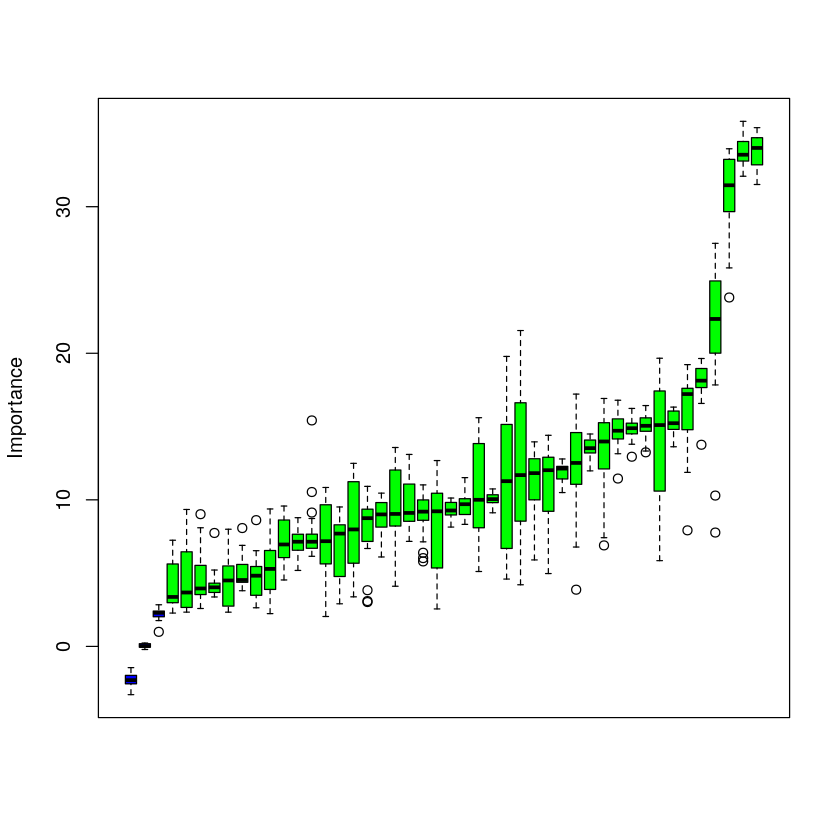

In [34]:
plot(boruta_output, xlab = "", xaxt = "n")
lz <- lapply(1:ncol(boruta_bank$ImpHistory), function(i) boruta_bank$ImpHistory[is.finite(boruta_bank$ImpHistory[,i]),i])
names(lz) <- colnames(boruta_bank$ImpHistory)
Labels <- sort(sapply(lz,median))   